# Aprendizado de Máquina - Atividade do primeiro semestre
### Bloco 1

O target numérico é a largura do bico, que será prevista a partir de parâmetros como a profundidade desse bico, massa corporal, etc. Um futuro target categórico pode ser a espécie do pinguim.

In [14]:
import seaborn as sns

df = sns.load_dataset('penguins')
print(df.dtypes)
#print(df)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


In [15]:
# importa a biblioteca para plotar os gráficos
import matplotlib.pyplot as plt

In [16]:
# Converte os dados
df = df.convert_dtypes() 
print(df.dtypes)
#print(df)

species               string
island                string
bill_length_mm       Float64
bill_depth_mm        Float64
flipper_length_mm      Int64
body_mass_g            Int64
sex                   string
dtype: object


In [17]:
# Elimina as linhas que possuem lacunas sem dados
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)

#print(dfcopia)


In [18]:
# Cria um dataset somente com os features numéricos
features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

print(df_numericos)

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7                181         3750
1              39.5           17.4                186         3800
2              40.3           18.0                195         3250
4              36.7           19.3                193         3450
5              39.3           20.6                190         3650
..              ...            ...                ...          ...
338            47.2           13.7                214         4925
340            46.8           14.3                215         4850
341            50.4           15.7                222         5750
342            45.2           14.8                212         5200
343            49.9           16.1                213         5400

[333 rows x 4 columns]


In [19]:
df_normalizado = df_numericos.copy()

#normalizando coluna por coluna com o método de mínimo e máximo:

#primeira coluna (comprimento do bico)
maximo_bill_length = df_normalizado['bill_length_mm'].max()
minimo_bill_length = df_normalizado['bill_length_mm'].min()

df_normalizado['bill_length_norm'] = (df_normalizado['bill_length_mm'] - minimo_bill_length) / (maximo_bill_length - minimo_bill_length)

#segunda coluna (profundidade do bico)
maximo_bill_depth = df_normalizado['bill_depth_mm'].max()
minimo_bill_depth = df_normalizado['bill_depth_mm'].min()

df_normalizado['bill_depth_norm'] = (df_normalizado['bill_depth_mm'] - minimo_bill_depth) / (maximo_bill_depth - minimo_bill_depth)

#terceira coluna (envergadura das nadadeiras)
maximo_flipper_length = df_normalizado['flipper_length_mm'].max()
minimo_flipper_length = df_normalizado['flipper_length_mm'].min()

df_normalizado['flipper_length_norm'] = (df_normalizado['flipper_length_mm'] - minimo_flipper_length) / (maximo_flipper_length - minimo_flipper_length)

#quarta coluna (peso corporal)
maximo_body_mass = df_normalizado['body_mass_g'].max()
minimo_body_mass = df_normalizado['body_mass_g'].min()

df_normalizado['body_mass_norm'] = (df_normalizado['body_mass_g'] - minimo_body_mass) / (maximo_body_mass - minimo_body_mass)
#print(df_normalizado)

#criando um novo dataframe só com os dados normalizados.
df_normalizado2 = df_normalizado.reindex(["bill_length_norm","bill_depth_norm","flipper_length_norm","body_mass_norm"],axis=1)

print(df_normalizado2)

     bill_length_norm  bill_depth_norm  flipper_length_norm  body_mass_norm
0            0.254545         0.666667             0.152542        0.291667
1            0.269091         0.511905             0.237288        0.305556
2            0.298182         0.583333             0.389831        0.152778
4            0.167273         0.738095             0.355932        0.208333
5            0.261818         0.892857             0.305085        0.263889
..                ...              ...                  ...             ...
338          0.549091         0.071429             0.711864        0.618056
340          0.534545         0.142857             0.728814        0.597222
341          0.665455         0.309524             0.847458        0.847222
342          0.476364         0.202381             0.677966        0.694444
343          0.647273         0.357143             0.694915            0.75

[333 rows x 4 columns]


In [20]:
# análises exploratória e estatística dos dados:

print(df_normalizado2.shape) # checando o tamanho do dataframe (333 linhas e 4 colunas)
print(df_normalizado2.index) # nota-se que o index não está ordenado, apresentando lacunas.

(333, 4)
Int64Index([  0,   1,   2,   4,   5,   6,   7,  12,  13,  14,
            ...
            332, 333, 334, 335, 337, 338, 340, 341, 342, 343],
           dtype='int64', length=333)


In [21]:
# para resolver esse problema, utiliza-se o método reset_index:
df_arrumado = df_normalizado2.reset_index(drop=True) # no qual drop=True significa que a nova coluna index irá substituir a anterior completamente,
# ao invés de apenas ser acrescentada como mais uma coluna.

In [22]:
print(df_arrumado.index) # checando se o método funcionou
print(df_arrumado) # :) funcionou

RangeIndex(start=0, stop=333, step=1)
     bill_length_norm  bill_depth_norm  flipper_length_norm  body_mass_norm
0            0.254545         0.666667             0.152542        0.291667
1            0.269091         0.511905             0.237288        0.305556
2            0.298182         0.583333             0.389831        0.152778
3            0.167273         0.738095             0.355932        0.208333
4            0.261818         0.892857             0.305085        0.263889
..                ...              ...                  ...             ...
328          0.549091         0.071429             0.711864        0.618056
329          0.534545         0.142857             0.728814        0.597222
330          0.665455         0.309524             0.847458        0.847222
331          0.476364         0.202381             0.677966        0.694444
332          0.647273         0.357143             0.694915            0.75

[333 rows x 4 columns]


In [23]:
print(df_arrumado.columns) # conferindo as colunas:

Index(['bill_length_norm', 'bill_depth_norm', 'flipper_length_norm',
       'body_mass_norm'],
      dtype='object')


<br>

A coluna `bill_length_norm` representa os valores normalizados do comprimento de bico de cada pinguim (*os valores originais em mm podem ser encontrados na coluna `bill_length_mm` do dataframe `df_numericos`, que contém todos os valores originais*), enquanto `bill_depth_norm`, os valores normalizados da sua altura (*valores originais na coluna `bill_depth_mm` do outro dataframe*). Abaixo, encontra-se uma imagem para melhor entendimento desses atributos:
<center><img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=50% height=auto>
<figcaption>Fonte: https://allisonhorst.github.io/palmerpenguins/
<br><br>
    
Da mesma maneira, `flipper_length_norm` consiste nos valores normalizados do comprimento das nadadeiras (*podendo ser encontrado em mm no atributo `flipper_length_mm` do dataframe numérico*). Por fim, `body_mass_norm` contém os valores normalizados de massa corporal (no caso, o peso) de cada pinguim (*seus valores em gramas estão em `body_mass_g`*).

In [24]:
print(df_arrumado.dtypes) # apenas conferindo os tipos novamente

bill_length_norm       Float64
bill_depth_norm        Float64
flipper_length_norm    Float64
body_mass_norm         Float64
dtype: object


In [25]:
# análise geral:

print(df_arrumado.describe())

       bill_length_norm  bill_depth_norm  flipper_length_norm  body_mass_norm
count        333.000000       333.000000           333.000000      333.000000
mean           0.432465         0.483912             0.490966        0.418627
std            0.198861         0.234433             0.237555        0.223671
min            0.000000         0.000000             0.000000        0.000000
25%            0.269091         0.297619             0.305085        0.236111
50%            0.450909         0.500000             0.423729        0.375000
75%            0.600000         0.666667             0.694915        0.576389
max            1.000000         1.000000             1.000000        1.000000


### Gráficos
A seguir foram plotados dois tipos de gráficos, um histograma e um de *scattering*. Foram feitos dois de cada a fim de comparar o data frame normalizado em relação à sua versão final (arrumado). 
Através do gráfico de *scattering*, podemos observar se há alguma relação entre determinadas colunas dos nossos dados. Assim como dito no começo do arquivo, o target é a largura do bico, a qual será relacionada/prevista por meio dos outros parâmetros.

<AxesSubplot:ylabel='Frequency'>

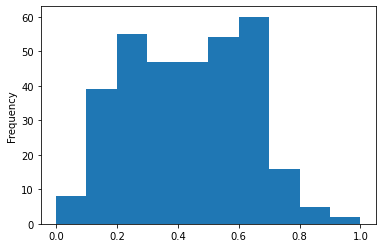

In [26]:
df_normalizado2.bill_length_norm.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

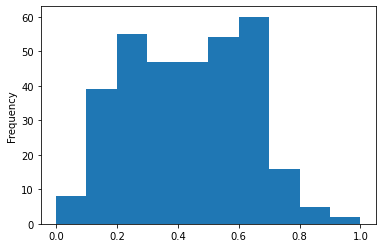

In [27]:
df_arrumado.bill_length_norm.plot(kind = 'hist')

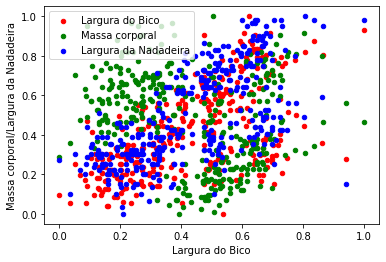

In [28]:
ax1 = df_normalizado2.plot(kind='scatter', x="bill_length_norm", y="body_mass_norm", color='Red', label="Largura do Bico")
ax2 = df_normalizado2.plot(kind='scatter', x="bill_length_norm", y="bill_depth_norm", color='Green', label="Massa corporal", ax=ax1)
ax3 = df_normalizado2.plot(kind='scatter', x="bill_length_norm", y="flipper_length_norm", color='Blue', label="Largura da Nadadeira", ax=ax2)
plt.xlabel('Largura do Bico')
plt.ylabel('Massa corporal/Largura da Nadadeira')
plt.show()

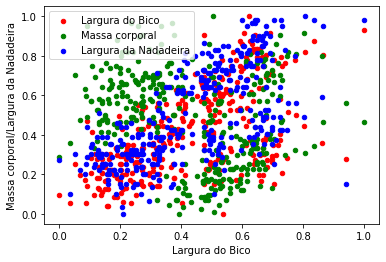

In [29]:
ax1 = df_arrumado.plot(kind='scatter', x="bill_length_norm", y="body_mass_norm", color='Red', label="Largura do Bico")
ax2 = df_arrumado.plot(kind='scatter', x="bill_length_norm", y="bill_depth_norm", color='Green', label="Massa corporal", ax=ax1)
ax3 = df_arrumado.plot(kind='scatter', x="bill_length_norm", y="flipper_length_norm", color='Blue', label="Largura da Nadadeira", ax=ax2)
plt.xlabel('Largura do Bico')
plt.ylabel('Massa corporal/Largura da Nadadeira')
plt.show()

<br>

A partir dos dados acima pode-se observar que existem 333 linhas (cada uma com os dados de um pinguim diferente) presentes no dataframe `df_arrumado`. A média aritmética desses 333 valores - que já estão normalizados pelo método de máximo e mínimo, estando sempre entre 0 e 1 - para cada feature, está indicada na linha `mean`. Vê-se que nenhuma das médias atinge ou passa o 0.5 (apesar de `flipper_length_norm` chegar próximo), indicando uma maioria de valores menores que a média do maior e menor número, e valores altos mais escarços e com maior diferença entre si. Já a linha `std`, do inglês *standart deviation*, indica o desvio padrão de cada atributo. Estes valores, por sua vez, se encontram próximos a 0.2, nunca ultrapassando 0.25. Pode-se afirmar também que o atributo mais estável (e, portanto, com menor desvio padrão) é a medida que representa o comprimento do bico.

Em seguida, observa-se o valor mínimo e máximo, a mediana, e mais dois pontos entre eles (os pontos 25% e 75%) referentes a cada atributo do dataframe. Para melhor compreender o significado desses valores, pode-se imaginar uma lista com todos os valores de um atributo, ordenados de maneira crescente: assim, o valor mínimo representa o primeiro item da lista (no python, index 0); o máximo, o último (index 332 para a nossa de lista de 333 pinguins); o ponto de 50%, também chamado de mediana, está na posição que divide a lista na metade (para 33 valores, seria o de index 166); o de 25% se encontra na posição de número correspondente a 25% do tamanho total da lista (no nosso caso, index 83); por fim, o ponto de 75% representa o valor na posição de 75% do total (index 249).
Na célula de código abaixo, pode-se ver esse processo sendo feito manualmente para melhor entendimento, usando como exemplo o atributo `bill_length_norm`:

In [30]:
lista_exemplo = list(df_arrumado["bill_length_norm"]) # cria uma lista a partir de todos os valores dentro de bill_length_norm
lista_exemplo.sort() # arruma a lista em ordem crescente
print(f"min: {round(lista_exemplo[0],6)}",
      f"25%: {round(lista_exemplo[83],6)}",
      f"50%: {round(lista_exemplo[166],6)}",
      f"75%: {round(lista_exemplo[249],6)}",
      f"max: {round(lista_exemplo[332],6)}",
     sep="\n")
# o código acima exibe a legenda com seus respectivos valores, retirados da lista ordenada e arredondados até a 6ª casa decimal
# observa-se que os valores exibidos são idênticos aos apresentados anteriormente pela função describe()

min: 0.0
25%: 0.269091
50%: 0.450909
75%: 0.6
max: 1.0


In [31]:
# a seguir, se encontra o cálculo e os valores de obliquidade (skewness)
# e curtose (kurtosis) para cada feature do dataframe
print("--------- obliquidade:---------")
print(df_arrumado.skew())
print()
print("----------- curtose:-----------")
print(df_arrumado.kurt())

--------- obliquidade:---------
bill_length_norm       0.045340
bill_depth_norm       -0.149720
flipper_length_norm    0.360148
body_mass_norm         0.472246
dtype: float64

----------- curtose:-----------
bill_length_norm      -0.883418
bill_depth_norm       -0.891960
flipper_length_norm   -0.961241
body_mass_norm        -0.733489
dtype: float64


<br>

Obliquidade e curtose são termos estatísticos, sendo que o primeira estima o formato de uma distribuição, sendo um método importante para categorizar comportamentos assimétricos. Já a curtose, por sua vez, determina se uma distribuição possui "cauda pesada" (*heavy-tailed*) quando comparada à distribuição normal. A imagem abaixo representa melhor o que ambas as funções representam em termos gráficos:
<center><img src="https://www.analyticsvidhya.com/wp-content/uploads/2014/07/skewness-and-kurtosis.gif" width=50% height=auto>
<figcaption>Fonte: https://www.analyticsvidhya.com/blog/2014/07/statistics/
<br><br>

A obliquidade não é nula em nenhum dos atributos acima; portanto, os dados se apresentam como assimétricos quando comparamos a primeira metade à segunda. Interpretando graficamente, as features que apresentam obliquidade positiva (comprimento do bico, das nadadeiras e massa corporal) possuem mais peso do lado esquerdo da distribuição; ou seja, os valores tendem a ser menores. A altura do bico (`bill_depth_norm`), no entanto, possui obliquidade negativa; apresentando, portanto, valores com tendência a serem maiores. Isso poderá ser melhor observado futuramente, na plotagem dos gráficos.
    
A curtose calculada para as features se apresentou negativa em todos os casos; isso significa que, em uma representação gráfica, a curva que descreve os valores é platicúrtica: possui um topo menos elevado, sendo mais plana que uma distribuição normal.

In [37]:
# Seleciona os dados que serão utilizados para treino e para teste

import seaborn as sns
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 61454
FEATURES = ["bill_depth_norm", "flipper_length_norm", "body_mass_norm"]
TARGET = ["bill_length_norm"]

df = df_arrumado

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]


X_treino = df_treino.reindex(FEATURES, axis=1).values
y_treino = df_treino.reindex(TARGET, axis=1).values
X_teste = df_teste.reindex(FEATURES, axis=1).values
y_teste = df_teste.reindex(TARGET, axis=1).values
print(df_teste)

     bill_length_norm  bill_depth_norm  flipper_length_norm  body_mass_norm
91           0.298182         0.642857              0.40678        0.458333
162          0.661818         0.821429             0.423729        0.166667
322          0.643636         0.333333             0.966102        0.902778
187          0.512727          0.52381             0.254237        0.263889
98           0.210909         0.654762             0.355932          0.0625
128          0.218182         0.535714             0.254237        0.201389
304          0.487273         0.166667             0.677966        0.569444
197          0.701818         0.702381             0.491525        0.347222
3            0.167273         0.738095             0.355932        0.208333
115          0.203636         0.797619             0.440678        0.222222
66           0.272727         0.488095              0.40678        0.236111
303          0.730909          0.47619             0.949153            0.75
38          

In [33]:
from sklearn.dummy import DummyRegressor

# cria o modelo
modelo_baseline = DummyRegressor()

# treina o modelo
modelo_baseline.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_baseline.predict(X_teste)
print(previsao)

[0.43163272 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272
 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272
 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272
 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272
 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272 0.43163272
 0.43163272 0.43163272 0.43163272 0.43163272]


In [38]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_baseline.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo baseline foi de {RMSE}.")

O RMSE do modelo baseline foi de 0.21316585607193939.


In [39]:
# Modelo Linear

from sklearn.linear_model import LinearRegression

# cria o modelo
modelo_linear = LinearRegression()

# treina o modelo
modelo_linear.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_linear.predict(X_teste)
print(previsao)

[[0.41312053]
 [0.44290183]
 [0.7149755 ]
 [0.29003741]
 [0.36646872]
 [0.28937356]
 [0.49473791]
 [0.47028039]
 [0.38845057]
 [0.4513166 ]
 [0.37451616]
 [0.72401495]
 [0.44002538]
 [0.37641355]
 [0.37157071]
 [0.62001027]
 [0.25759603]
 [0.61557213]
 [0.21402842]
 [0.37612637]
 [0.4694386 ]
 [0.45812116]
 [0.4023972 ]
 [0.34552452]
 [0.48537677]
 [0.52251438]
 [0.27949306]
 [0.72436179]
 [0.48468384]
 [0.54671275]
 [0.34235442]
 [0.23886156]
 [0.5325124 ]
 [0.56094368]]


In [40]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_linear.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo linear foi de {RMSE}.")

O RMSE do modelo linear foi de 0.14895562614010924.


In [41]:
# Modelo através dos vizinhos mais próximos

from sklearn.neighbors import KNeighborsRegressor

# cria o modelo
modelo_knn = KNeighborsRegressor()

# treina o modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao)

[[0.4094545454545454]
 [0.5345454545454544]
 [0.7054545454545453]
 [0.27418181818181814]
 [0.22618181818181812]
 [0.29599999999999993]
 [0.49163636363636354]
 [0.4669090909090909]
 [0.46472727272727266]
 [0.6043636363636363]
 [0.4829090909090909]
 [0.6894545454545454]
 [0.36218181818181816]
 [0.3061818181818181]
 [0.3847272727272726]
 [0.6727272727272726]
 [0.2829090909090909]
 [0.512]
 [0.3905454545454545]
 [0.458181818181818]
 [0.49818181818181817]
 [0.46109090909090905]
 [0.5890909090909091]
 [0.2174545454545454]
 [0.4916363636363636]
 [0.5039999999999999]
 [0.28509090909090906]
 [0.6814545454545454]
 [0.4530909090909091]
 [0.5236363636363637]
 [0.25672727272727264]
 [0.25163636363636366]
 [0.6916363636363634]
 [0.5694545454545453]]


In [43]:
from sklearn.metrics import mean_squared_error

y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo k-NN foi de {RMSE}.")

O RMSE do modelo k-NN foi de 0.18059270428786128.


In [54]:
NUM_VIZINHOS = [10, 50, 100]

for n in NUM_VIZINHOS:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi de {RMSE}.")

O RMSE do modelo k-NN usando k=10 foi de 0.1546989234854736.
O RMSE do modelo k-NN usando k=50 foi de 0.1501058211723644.
O RMSE do modelo k-NN usando k=100 foi de 0.16585549127595367.


# Referências:
   
    [1] Horst AM, Hill AP, Gorman KB (2020). palmerpenguins: Palmer
    Archipelago (Antarctica) penguin data. R package version 0.1.0.
    https://allisonhorst.github.io/palmerpenguins/. doi:
    10.5281/zenodo.3960218.
    
    [2] How to Calculate Skewness and Kurtosis in Python? (2022,
    february 17). GeeksforGeeks.
    https://www.geeksforgeeks.org/how-to-calculate-skewness-and-kurtosis-in-python/

    [3] Using Statistics: Understand Population Distributions. (2014, julho 21).
    Analytics Vidhya. https://www.analyticsvidhya.com/blog/2014/07/statistics/
